In [1]:
texts = []
texts.append("Every  such  code  of  practices  and  procedures  for  fair  disclosure  of  unpublished  price  sensitive  information  and  every  amendment  thereto  shall  be  promptly  intimated  to  the  stock  exchanges where the securities are listed.")
texts.append("Every  listed  company,  market  intermediary  and  other  persons  formulating  a  code  of  conduct shall identify and designate a compliance officer to administer the code of conduct and other requirements under these regulations")
texts.append("The  board  of  directors  of  every  company,  whose  securities  are  listed  on  a  stock  exchange, shall formulate and publish on its official website, a code of practices and procedures for  fair  disclosure  of  unpublished  price  sensitive  information  that  it  would  follow  in  order  to  adhere  to  each  of  the  principles  set  out  in  Schedule  A  to  these  regulations,  without  diluting  the  provisions of these regulations in any manner.")
texts.append("An  insider  shall  be  entitled  to  formulate  a  trading  plan  and  present  it  to  the  compliance  officer  for  approval  and  public  disclosure  pursuant  to  which  trades  may  be  carried  out on his behalf in accordance with such plan.")
for i in range(len(texts)):
  texts[i] = " ".join(texts[i].split())

In [2]:
from nltk import ngrams

In [3]:
n = 10
tengrams = ngrams(texts[0].split(), n)

In [4]:
tg = [i for i  in tengrams]

In [5]:
import wikipediaapi

In [65]:

wiki_wiki = wikipediaapi.Wikipedia('en')
page_py = wiki_wiki.page('thereto')
print("Page - Exists: %s" % page_py.exists())

Page - Exists: False


In [92]:
page_py.categories

{'Category:All Wikipedia articles written in Indian English': Category:All Wikipedia articles written in Indian English (id: ??, ns: 14),
 'Category:All articles with unsourced statements': Category:All articles with unsourced statements (id: ??, ns: 14),
 'Category:Articles with unsourced statements from May 2010': Category:Articles with unsourced statements from May 2010 (id: ??, ns: 14),
 'Category:CS1 maint: numeric names: authors list': Category:CS1 maint: numeric names: authors list (id: ??, ns: 14),
 'Category:Commons category link is on Wikidata': Category:Commons category link is on Wikidata (id: ??, ns: 14),
 'Category:Economic history of India (1947–present)': Category:Economic history of India (1947–present) (id: ??, ns: 14),
 'Category:Executive branch of the Indian government': Category:Executive branch of the Indian government (id: ??, ns: 14),
 'Category:Financial regulatory authorities of India': Category:Financial regulatory authorities of India (id: ??, ns: 14),
 'Ca

In [87]:
def print_categorymembers(categorymembers, level=0, max_level=100):
        for c in categorymembers.values():
            print("%s: %s (ns: %d)" % ("*" * (level + 1), c.title, c.ns))
            if c.ns == wikipediaapi.Namespace.CATEGORY and level < max_level:
                print_categorymembers(c.categorymembers, level=level + 1, max_level=max_level)


cat = wiki_wiki.page("Category:Insider trading")


In [88]:
print_categorymembers(cat.categorymembers)

*: Insider trading (ns: 0)
*: 2020 Congressional insider trading scandal (ns: 0)
*: Rodney Adler (ns: 0)
*: Bell v Lever Brothers Ltd (ns: 0)
*: Preet Bharara (ns: 0)
*: Steven A. Cohen (ns: 0)
*: Credit Suisse Securities (USA) LLC v. Simmonds (ns: 0)
*: Den of Thieves (Stewart book) (ns: 0)
*: ImClone stock trading case (ns: 0)
*: Market abuse (ns: 0)
*: The Predators' Ball (ns: 0)
*: Raj Rajaratnam/Galleon Group, Anil Kumar, and Rajat Gupta insider trading cases (ns: 0)
*: Reebok insider trading case (ns: 0)
*: Salman v. United States (ns: 0)
*: Tip and Trade (ns: 0)
*: Category:People convicted of insider trading (ns: 14)
**: Ivan Boesky (ns: 0)
**: Rune Brynhildsen (ns: 0)
**: Chris Collins (New York politician) (ns: 0)
**: Doug DeCinces (ns: 0)
**: Du Jun (ns: 0)
**: Robert M. Freeman (ns: 0)
**: Rajat Gupta (ns: 0)
**: Ian Hannam (ns: 0)
**: Simon Hannes (ns: 0)
**: Bill Keller (televangelist) (ns: 0)
**: Mychal Kendricks (ns: 0)
**: Dennis Levine (ns: 0)
**: Mathew Martoma (ns: 

# Plans 
Impplement a function to get 10 grams first and then match. If it matches then move on, else back off. 
ALGO:
1. NGrams(sentence)
2. Look up wiki
3. if page found, continue 
4. else backoff to n-1 gram
5. repeat

continue -> make a new 10 gram from the remaining set of words 

In [6]:
import time 
import wikipediaapi
from tqdm import tqdm
from nltk.tokenize import word_tokenize

def normalize(sentence):
  tokens = word_tokenize(sentence)
  tokens = [w.lower() for w in tokens]
  import string
  table = str.maketrans('', '', string.punctuation)
  stripped = [w.translate(table) for w in tokens]
  words = [word for word in tokens if word.isalpha()] 
  return words

def tokenize(sentence):
  return sentence.split()

def BackOffandLookUp(sentence,ngramSize = 5,sleepTime = 1.5):
    words = normalize(sentence)
    terms = []
    logs = []
    pbar = tqdm(total=len(words))
    start = 0
    end = ngramSize
    while start < len(words):
        if end >= len(words):
            end = len(words)
        query1 = words[start:end]
        query = ""
        query = ' '.join(query1)
        time.sleep(sleepTime)
        # print(start, end, query)
        page_py = wiki_wiki.page(query)
        if page_py.exists():
            terms.append((query, page_py))
            pbar.update(end-start)
            start = end 
            end = end + ngramSize
        else:
            if (end - start == 1):
              start += 1
              pbar.update(1)

              end = start + ngramSize
            else:
              end -= 1
        if end < start:
            start+=1
            pbar.update(1)

            end = start + ngramSize
    pbar.close() 
    return terms
        

In [7]:
# terms = []
# ngramSize = 5
# logs = []
# words = texts[0].split()
# start = 0
# end = ngramSize
# while start < len(words):
# #     print(terms)
#     if end > len(words):
#         end = len(words)
#     query1 = words[start:end]
#     query = ""
#     query = ' '.join(query1)
# #         print(query)
# #         input()
#     time.sleep(3)
#     if (start % 5 == 0):
#         print(start)
#     print(query)
#     page_py = wiki_wiki.page(query)
#     if not page_py:
#         start += 1
# #             logs.append((query,page_py.exists()))
# #         print(page_py.exists())
#     if page_py.exists():
#         terms.append(query)
#         start = end 
#         end = end + ngramSize
#     else:
#         end -= 1
#     if end < start:
#         start+=1
#         end = start + ngramSize

In [8]:
# texts[0]

In [9]:
import re
import json
import docx
final_text = []
doc = docx.Document("./Prohibition of Insider Trading 2015-extra.docx")
for i in range(len(doc.paragraphs)):
    text_iter = doc.paragraphs[i].text
#     print(text_iter)
    if text_iter.strip() != '':
        final_text.append(text_iter)

In [10]:
final_text_terms = []
wiki_wiki = wikipediaapi.Wikipedia('en')

for sen in tqdm(final_text):
    s = BackOffandLookUp(sen)
    final_text_terms.append(s)


 22%|██▏       | 41/186 [2:18:22<8:09:22, 202.50s/it]


ReadTimeout: HTTPSConnectionPool(host='en.wikipedia.org', port=443): Read timed out. (read timeout=10.0)

# Closed Document structure

In [1]:
import re
import json
import docx
final_text = []
doc = docx.Document("./Prohibition of Insider Trading 2015-extra.docx")
for i in range(len(doc.paragraphs)):
    text_iter = doc.paragraphs[i].text
#     print(text_iter)
    if text_iter.strip() != '':
        final_text.append(text_iter)

In [11]:
import json 
import numpy as np
definitions = json.load(open('definitions_dump.json'))

In [6]:
definitionMapping = {}
for i in definitions:
    definitionMapping[i] = {}
    for j in definitions:
        definitionMapping[i][j] = 0

for line in final_text:
    terms = []
    for term in definitions:
        if term in line:
            terms.append(term)
    for term in terms:
        for term1 in terms:
            definitionMapping[term][term1] += 1
            
        


In [51]:
definitionsAdjMatrix = [[0 for i in definitions] for i in definitions]

In [12]:
definitionsAdjMatrix = np.asarray(definitionsAdjMatrix)

In [52]:
iv , jv = 0,0
for i in definitions:
    jv = 0
    for j in definitions:
        definitionsAdjMatrix[iv][jv] = definitionMapping[i][j]
        jv+= 1
    iv += 1


labels = {}
count = 0
for i in definitions:
    labels[count] = i
    count += 1 

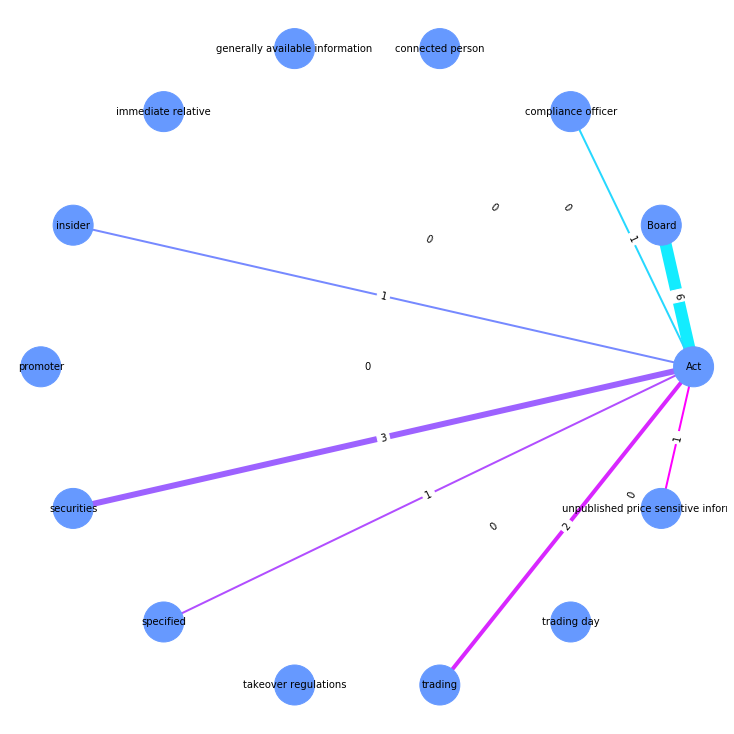

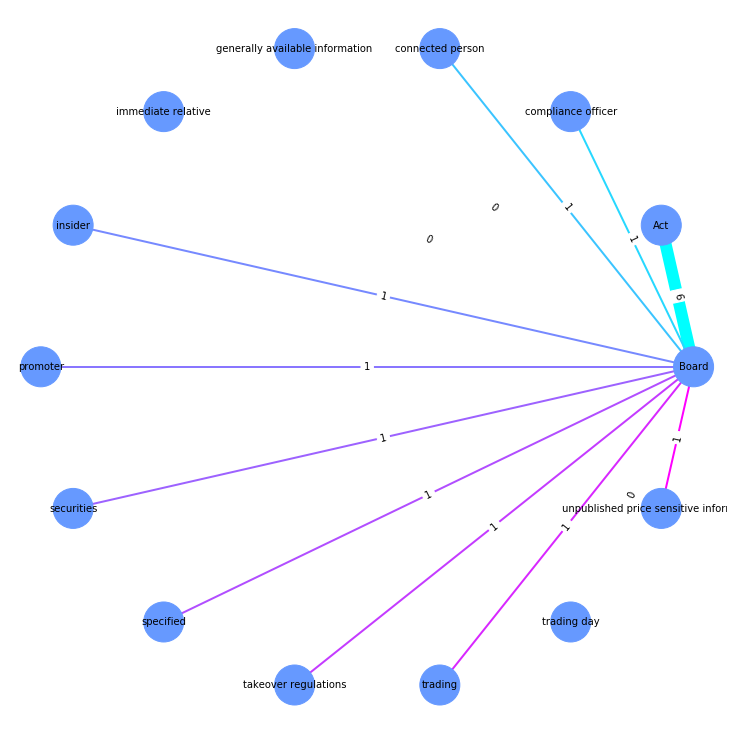

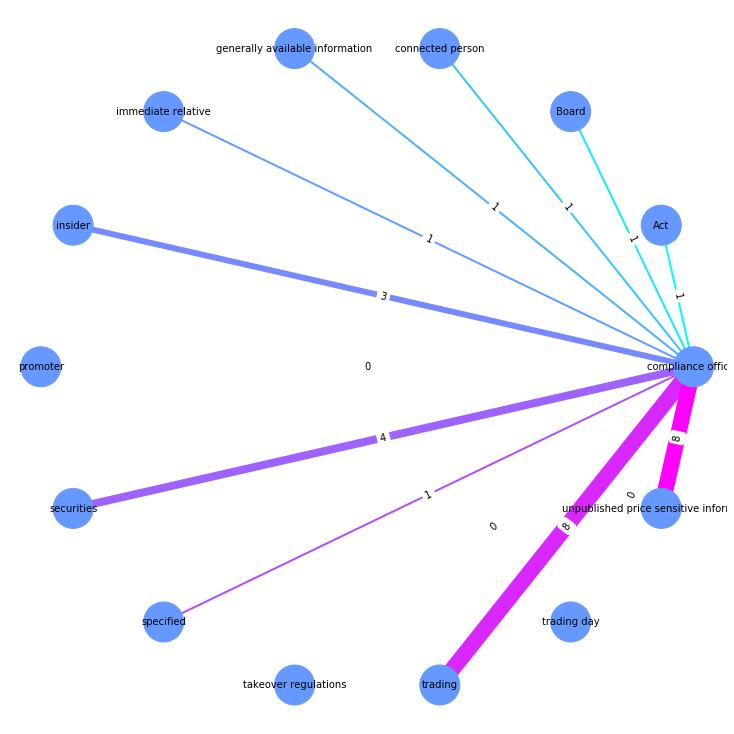

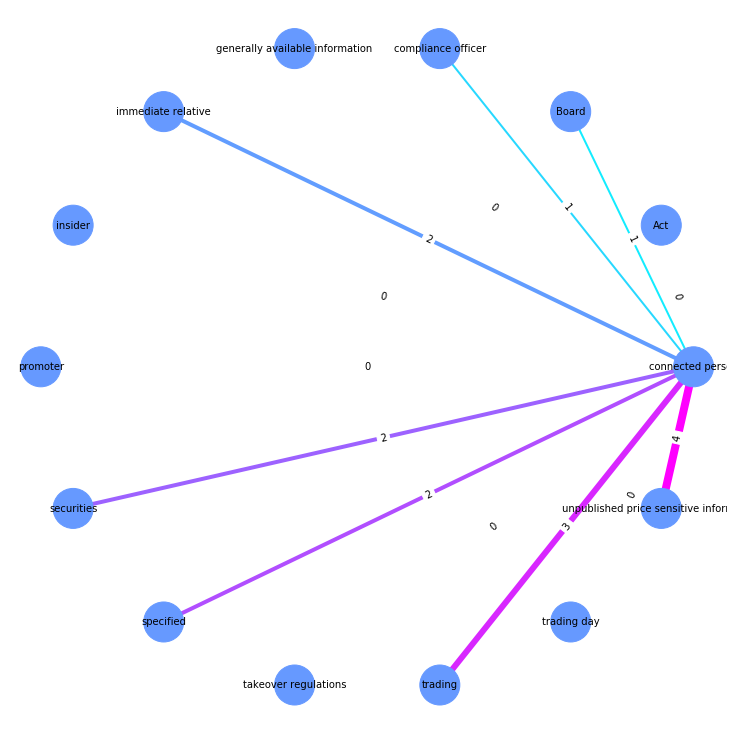

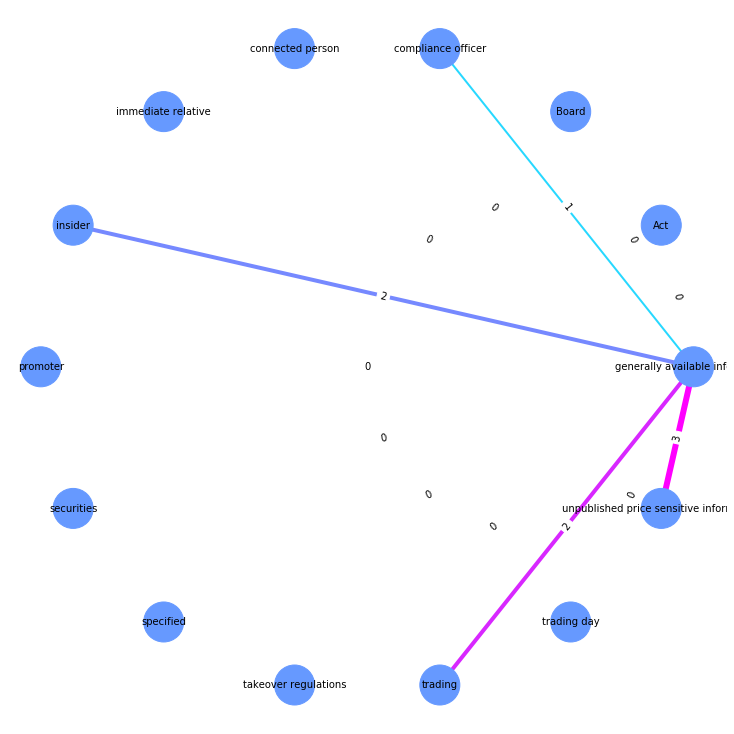

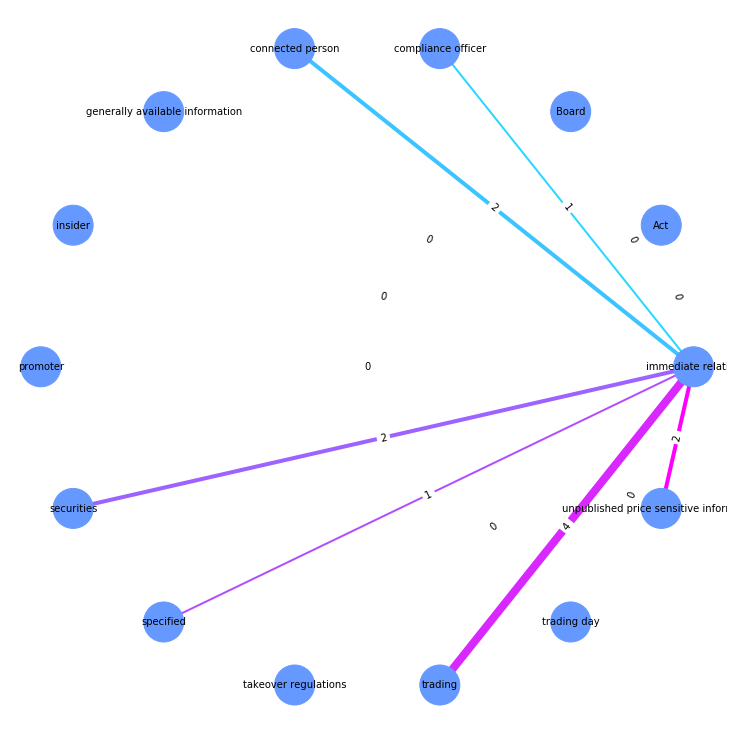

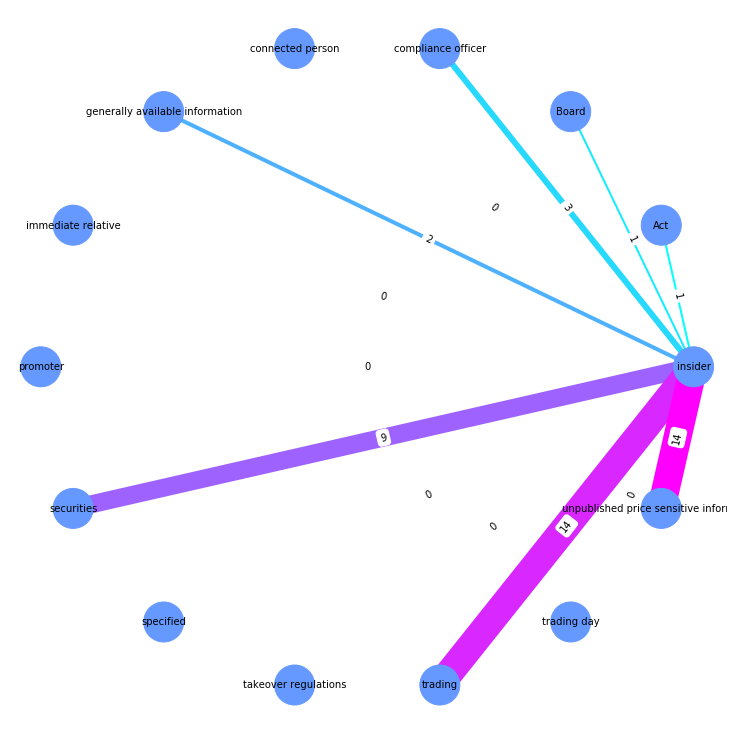

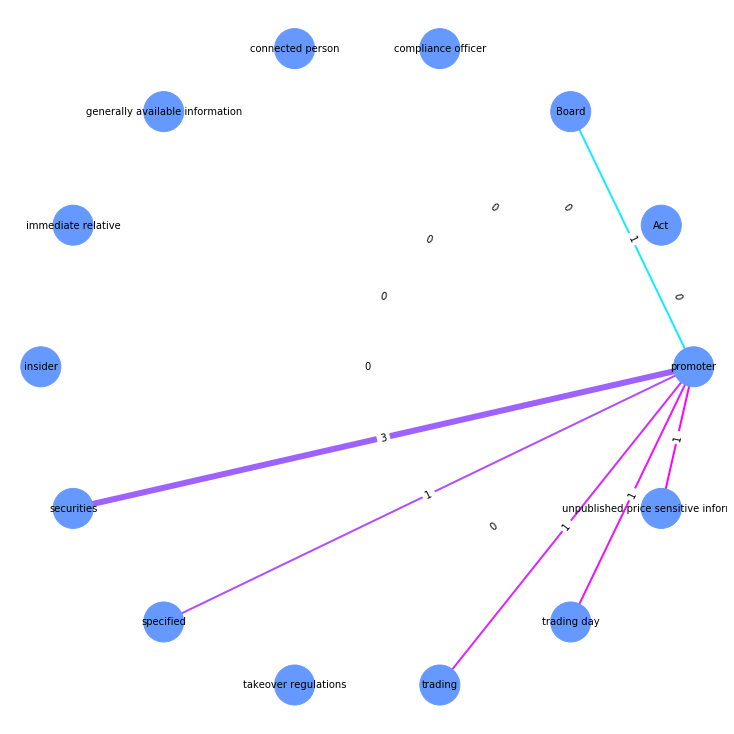

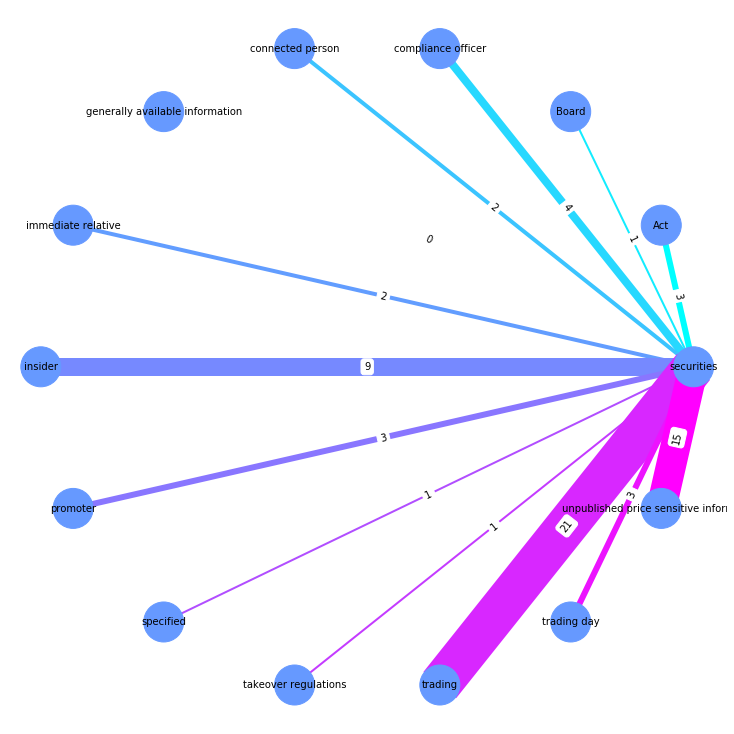

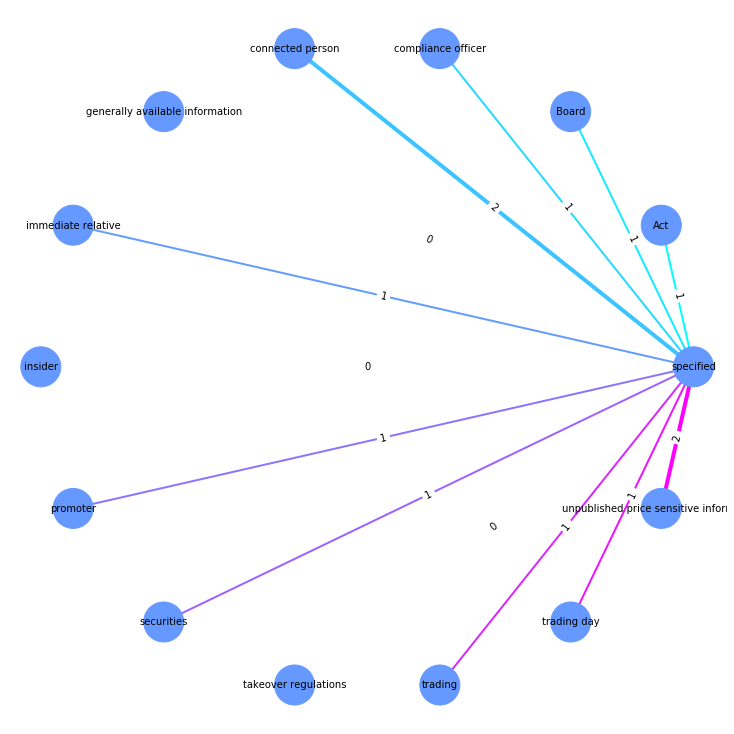

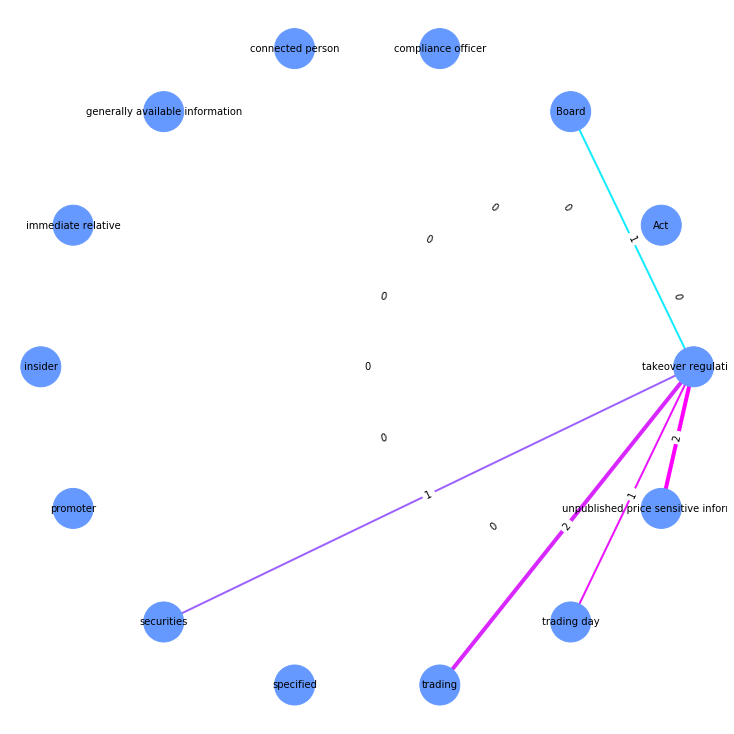

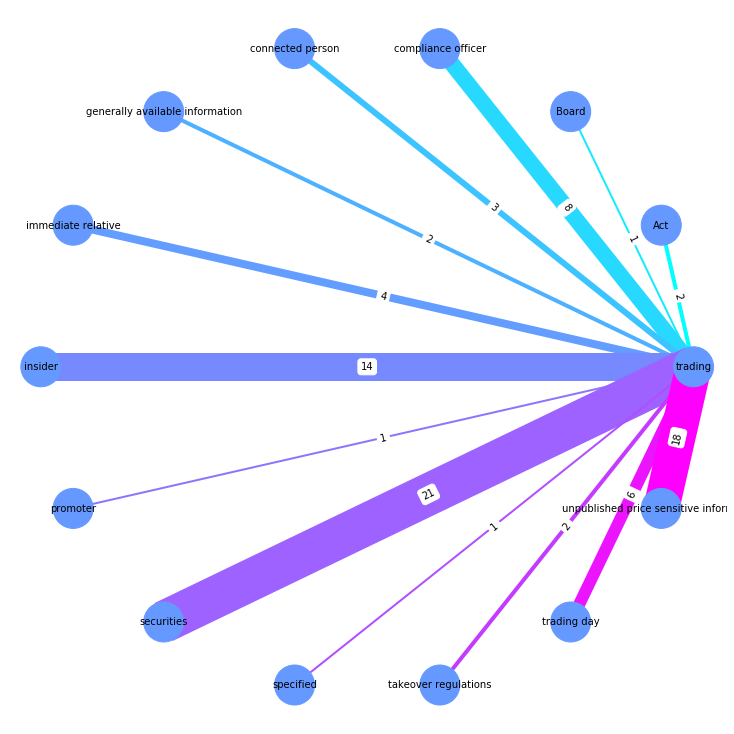

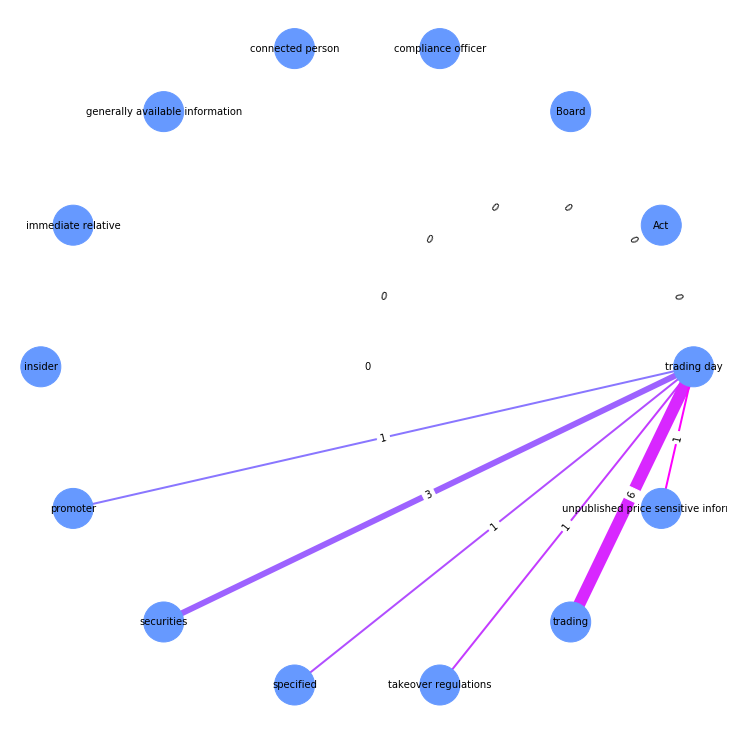

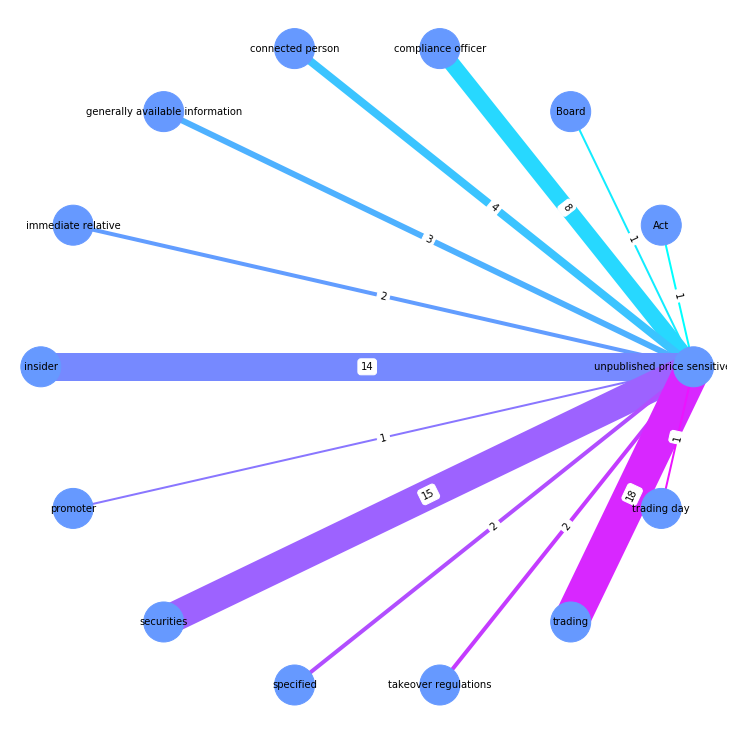

In [185]:
import matplotlib.pyplot as plt
import networkx as nx
# G2 = nx.from_numpy_matrix(definitionsAdjMatrix)\\
for termCurrent in range(len(definitions)):
    G = nx.Graph()
    colors=range(len(definitionsAdjMatrix))
    edge_labels = {}
    for i in range(len(definitionsAdjMatrix)):
        if i != termCurrent :
            continue
        for j in range(len(definitionsAdjMatrix)):
            G.add_edge(i,j,color=colors[j],weight = int(definitionsAdjMatrix[i][j]))
            edge_labels[(i,j)] = definitionsAdjMatrix[i][j]
    # nx.draw_circular(G2, width = definitionsAdjMatrix)
    weights = nx.get_edge_attributes(G,'weight').values()
    colors = nx.get_edge_attributes(G,'color').values()

    pos = nx.circular_layout(G)
    plt.figure(figsize=(10,10)) 
    nx.draw(G, pos, node_size= [1600 for i in definitions], node_color=['#6699ff' for i in definitions] ,edge_color=colors,width=[i*2 for i in list(weights)],edge_cmap=plt.cm.cool)
    nx.draw_networkx_labels(G2, pos = pos,font_size=10 ,labels=labels)
    nx.draw_networkx_edge_labels(G2, pos = pos,font_size=10 ,edge_labels=edge_labels)

    plt.axis('equal')
    name = labels[termCurrent] + '.png'
    plt.savefig('./' + name)

In [132]:
labels = {}
for i in definitions:
    labels[count] = i
    count += 1 

In [138]:
definitionMapping

{'Act': {'Act': 10,
  'Board': 6,
  'compliance officer': 1,
  'connected person': 0,
  'generally available information': 0,
  'immediate relative': 0,
  'insider': 1,
  'promoter': 0,
  'securities': 3,
  'specified': 1,
  'takeover regulations': 0,
  'trading': 2,
  'trading day': 0,
  'unpublished price sensitive information': 1},
 'Board': {'Act': 6,
  'Board': 18,
  'compliance officer': 1,
  'connected person': 1,
  'generally available information': 0,
  'immediate relative': 0,
  'insider': 1,
  'promoter': 1,
  'securities': 1,
  'specified': 1,
  'takeover regulations': 1,
  'trading': 1,
  'trading day': 0,
  'unpublished price sensitive information': 1},
 'compliance officer': {'Act': 1,
  'Board': 1,
  'compliance officer': 16,
  'connected person': 1,
  'generally available information': 1,
  'immediate relative': 1,
  'insider': 3,
  'promoter': 0,
  'securities': 4,
  'specified': 1,
  'takeover regulations': 0,
  'trading': 8,
  'trading day': 0,
  'unpublished price 

In [5]:
definitions = open('definitions_names.txt').read().splitlines()
definitions1 = list(set(definitions))
definitions = sorted(definitions)
definitions1 = sorted(definitions1)

In [6]:
count = 0
count1 = 0
missing = []
while count1 < len(definitions1):
    if definitions[count] == definitions1[count1]:
        count1+=1
        count+=1
    else:
        missing.append(definitions[count])
        count+=1
        


In [7]:
import os
file_path = "./HTML_TEXT/"
files = os.listdir('./HTML_TEXT/')


In [8]:
definitionMapping = {}
for i in definitions:
    definitionMapping[i] = {}
    for j in definitions:
        definitionMapping[i][j] = [0,[],[]]


def findWordinLine(term,line):
      return (' ' + term + ' ') in (' ' + line + ' ')


In [9]:
for file in files:
    lineNum = 0
    final_text = open(file_path+file).read().splitlines()
    for line in final_text:
        terms = []
        for term in definitions:
            if findWordinLine(term, line):
                terms.append(term)
        for term in terms:
            for term1 in terms:
                definitionMapping[term][term1][0] += 1
                definitionMapping[term][term1][1].append(line)
                definitionMapping[term][term1][2].append((file,lineNum))
        lineNum += 1
    

[878,
 ['h) “e-auction” means the public auction conducted through electronic mode; ',
  'public servant within the meaning of section 21 of the Indian Penal Code (45 of 1860) ',
  'Officer, with a scheduled public sector bank for depositing the proceeds of the ',
  'deposited in a separate bank account with a scheduled public sector bank in terms of ',
  '(iii) there has been a public disclosure by the applicant. ',
  'action or make or permit to be made any public statement denying, directly or indirectly, ',
  'b. it was unable on demand to refund fully any public deposit, payment or ',
  'public and requires professional education, training or licensing, e.g. chartered ',
  '(b) the conduct did not result in substantial injury to the rights of public investors, or ',
  '(g). a member of the board of directors or an employee, of a public financial ',
  'public on a non-discriminatory basis; ',
  'materially affect the price upon coming into the public domain. The types of matters th

In [5]:
import numpy as np
definitionsAdjMatrix = [[0 for i in definitions] for i in definitions]
definitionsAdjMatrix = np.asarray(definitionsAdjMatrix)

In [6]:
iv , jv = 0,0
for i in definitions:
    jv = 0
    for j in definitions:
        definitionsAdjMatrix[iv][jv] = definitionMapping[i][j]
        jv+= 1
    iv += 1


labels = {}
count = 0
for i in definitions:
    labels[count] = i
    count += 1 

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
# G2 = nx.from_numpy_matrix(definitionsAdjMatrix)\\
for termCurrent in range(len(definitions)):
    G = nx.Graph()
    colors=range(len(definitionsAdjMatrix))
    edge_labels = {}
    for i in range(len(definitionsAdjMatrix)):
        if i != termCurrent :
            continue
        for j in range(len(definitionsAdjMatrix)):
            G.add_edge(i,j,color=colors[j],weight = int(definitionsAdjMatrix[i][j]))
            edge_labels[(i,j)] = definitionsAdjMatrix[i][j]
    # nx.draw_circular(G2, width = definitionsAdjMatrix)
    weights = nx.get_edge_attributes(G,'weight').values()
    colors = nx.get_edge_attributes(G,'color').values()

    pos = nx.circular_layout(G)
    plt.figure(figsize=(70,70)) 
    nx.draw(G, pos, node_size= [1600 for i in definitions], node_color=['#6699ff' for i in definitions] ,edge_color=colors,width=[1 if i!= 0 else 0 for i in list(weights)],edge_cmap=plt.cm.cool)
    nx.draw_networkx_labels(G, pos = pos,font_size=10 ,labels=labels)
    nx.draw_networkx_edge_labels(G, pos = pos,font_size=10 ,edge_labels=edge_labels)

    plt.axis('equal')
    name = labels[termCurrent] + '.png'
    plt.savefig('./' + name)

/home/badwolf/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


In [13]:
x = definitionMapping['act']

In [15]:
y = {}
for i in x:
    if x[i] > 15:
        y[i] = x[i]

In [17]:
defintionsXX = [i for i in range(len(y))]

In [25]:
# import matplotlib.pyplot as plt
# import networkx as nx
# G = nx.Graph()
# edge_labels = {}
# colors=range(len(defintionsXX))
# defintionMapXX = {}
# count = 0
# for i in y:
#     defintionMapXX[count] = i
#     count += 1
    
# for i in range(len(defintionsXX)):
#     G.add_edge(0,i,color=colors[i], weight = int(y[defintionMapXX[i]]))
#     edge_labels[(0,i)] = y[defintionMapXX[i]]
    
# weights = nx.get_edge_attributes(G,'weight').values()
# colors = nx.get_edge_attributes(G,'color').values()

# pos = nx.circular_layout(G)
# plt.figure(figsize=(20,20)) 
# nx.draw(G, pos, node_size= [1600 for i in defintionsXX], node_color=['#6699ff' for i in defintionsXX] ,edge_color=colors,width=[1 if i!= 0 else 0 for i in list(weights)],edge_cmap=plt.cm.cool)
# nx.draw_networkx_labels(G, pos = pos,font_size=10 ,labels=defintionMapXX)
# nx.draw_networkx_edge_labels(G, pos = pos,font_size=10 ,edge_labels=edge_labels)
# plt.axis('equal')
# plt.show()

In [26]:
definitionsAdjMatrix

array([[635688,   4536,     90, ...,     72,      0,      0],
       [  4536, 152928,     54, ...,      0,      0,      0],
       [    90,     54,     82, ...,      0,      0,      0],
       ...,
       [    72,      0,      0, ...,    212,      4,      0],
       [     0,      0,      0, ...,      4,     28,      0],
       [     0,      0,      0, ...,      0,      0,    315]])

In [27]:
import py2neo

<module 'py2neo' from '/home/badwolf/anaconda3/lib/python3.7/site-packages/py2neo/__init__.py'>

In [1]:
with open('repetitions.txt') as handle:
    repsF = handle.read().splitlines()

reps = {}
flag = 1
for line in repsF:
    if flag == 1:
        reps[line[:-1]] = []
        flag = line[:-1]
    else:
        if line != '':
            reps[flag].append(line)
        else:
            flag = 1


In [2]:
definitions = open('definitions_names.txt').read().splitlines()
definitions1 = list(set(definitions))
definitions = sorted(definitions)
definitions1 = sorted(definitions1)

In [3]:
for def1 in definitions1:
    if def1 in reps.keys():
        definitions1.remove(def1)

for rep in reps:
    for i in range(len(reps[rep])):
        definitions1.append(rep+'_' + str(i+1))

In [4]:
definitionMapping = {}
for i in definitions1:
    definitionMapping[i] = {}
    for j in definitions1:
        definitionMapping[i][j] = [0,[],[]]


def findWordinLine(term,line):
    if term[-1].isnumeric():
        return (' ' + term[:-2] + ' ') in (' ' + line + ' ')
    return (' ' + term + ' ') in (' ' + line + ' ')

def removeRepeatedTerms(terms):
    newTerms = []
    terms = sorted(terms)
    for i in range(len(terms)):
        t = True
        for j in range(i,len(terms)):
            if findWordinLine(terms[i], terms[j]):
                if terms[i] != terms[j]:
                    t= False
                    break
        if t:
            newTerms.append(terms[i])
    return newTerms
    

In [5]:
import os
file_path = "./HTML_TEXT/"
files = os.listdir('./HTML_TEXT/')

allLines = []
c = 0
for file in files:
    if file != '1571225904231.htmlTxt':
        continue
    lineNum = 0
    final_text = open(file_path+file).read().splitlines()
    for line in final_text:
        terms = []
        for term in definitions1:
            if findWordinLine(term, line):
                if term[-1].isnumeric():
                    if file == reps[term[:-2]][int(term[-1])-1]:
                        terms.append(term)
                else:
                    terms.append(term)
        terms = removeRepeatedTerms(terms)
        allLines.append(terms)
        for term in terms:
            for term1 in terms:
                definitionMapping[term][term1][0] += 1
                c+=1
                definitionMapping[term][term1][1].append(line)
                definitionMapping[term][term1][2].append((file,lineNum))
        lineNum += 1
    

In [6]:
allLines = [x for x in allLines if x!= []]

In [7]:
import pickle 
with open('defCoOcc.pkl','wb') as handle:
    pickle.dump(definitionMapping,handle)


In [8]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
dataset = allLines
te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)


In [55]:
import py2neo

In [76]:
from py2neo import Graph
graph = Graph(host="10.2.24.156", password='dsac')
# graph = Graph( password='lol')





In [77]:
# from py2neo import Node, Relationship
# from tqdm import tqdm
# tx = graph.begin()

# definitionMappingneo4j = {}
# for def1 in definitions1:
#     def11 = Node("Definition", name=def1)
#     definitionMappingneo4j[def1] =def11
#     tx.create(def11)

# for term1 in tqdm(definitionMapping):
#     for term2 in definitionMapping:
#         r = Relationship(definitionMappingneo4j[term1], definitionMappingneo4j[term2], number=int(definitionMapping[term1][term2][0]))
#         tx.create(r)

# tx.commit()
        


In [79]:
from py2neo import Node, Relationship
from tqdm import tqdm
tx = graph.begin()
defsDone = []
definitionMappingneo4j = {}
# for def1 in definitions1:
#     def11 = Node("Definition", name=def1)
#     definitionMappingneo4j[def1] =def11
#     tx.create(def11)

for term1 in tqdm(definitionMapping):
    for term2 in definitionMapping:
        if term1 == term2:
            continue
        if definitionMapping[term1][term2][0] > 0:
            if term1 not in defsDone:
                def11 = Node("Definition", name=term1)
                definitionMappingneo4j[term1] =def11
                tx.create(def11)
                
                defsDone.append(term1)
            if term2 not in defsDone:
                def11 = Node("Definition", name=term2)
                definitionMappingneo4j[term2] =def11
                defsDone.append(term2)
                tx.create(def11)
                
                
                
            r = Relationship(definitionMappingneo4j[term1], definitionMappingneo4j[term2], number=int(definitionMapping[term1][term2][0]))
            tx.create(r)

tx.commit()
        

100%|██████████| 244/244 [00:08<00:00, 27.45it/s]


In [7]:
nodes = []
edges = []
from tqdm import tqdm

# for def1 in definitions1:
#     def11 = Node("Definition", name=def1)
#     definitionMappingneo4j[def1] =def11
#     tx.create(def11)

for term1 in tqdm(definitionMapping):
    for term2 in definitionMapping:
        if term1 == term2:
            continue
        if definitionMapping[term1][term2][0] > 0:
            if term1 not in nodes:
                nodes.append(term1)
            if term2 not in nodes:
                nodes.append(term2)
            edges.append([term1, term2, definitionMapping[term1][term2][0], definitionMapping[term1][term2][1]])
                
                
            
        

100%|██████████| 244/244 [00:00<00:00, 5762.12it/s]


In [25]:
finalJson = {}
finalJson['nodes'] = []
for node in nodes:
        finalJson['nodes'].append({'term':node, 'type':'M', 'selected': False})

finalJson['edges'] = []
for edge in edges:
#     print(edge)
    s,d = edge[0], edge[1]
    sentences  = ""
    for sent in edge[3]:
        sentences = sentences + str(sent) + "\r\n\r\n" 
    finalJson['edges'].append({'source':s, 'target':d, 'number': edge[2], 'sentences': sentences})



import json
with open('graphData.json','w') as handle:
    json.dump(finalJson,handle)

In [15]:
print(sentences)

NOTE: Since “generally available information” is defined, it is intended that anyone in possession of or having access to unpublished price sensitive information should be considered an “insider” regardless of how one came in possession of or had access to such information. Various circumstances are provided for such a person to demonstrate that he has not indulged in insider trading. Therefore, this definition is intended to bring within its reach any person who is in receipt of or has access to unpublished price sensitive information. The onus of showing that a certain person was in possession of or had access to unpublished price sensitive information at the time of trading would, therefore, be on the person leveling the charge after which the person who has traded when in possession of or having access to unpublished price sensitive information may demonstrate that he was not in such possession or that he has not traded or or he could not access or that his trading when in possessi

In [108]:
import csv
with open('graphDataTable.tsv', 'w') as f:
    f.write('Term1\tTerm2\tFrequency\n')
    for edge in edges:
         f.write("%s\t%s\t%s\n"%(edge[0],edge[1],edge[2]))

In [38]:
from mlxtend.frequent_patterns import apriori
frequent_itemsets = apriori(df, min_support=0.0004, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))

In [43]:
df1 = ((frequent_itemsets[ (frequent_itemsets['length'] > 1) &
                   (frequent_itemsets['support'] >= 0.0004) ]))


In [1]:
# import io
# with io.StringIO() as buffer:
#     df1.to_csv(buffer, sep='\t', index=False)
#     print(buffer.getvalue())

In [19]:
newDf = {}
for i in definitionMapping:
    newDf[i] = {}
    for j in definitionMapping[i]:
        if definitionMapping[i][j][0] > 0:
            newDf[i][j]= definitionMapping[i][j]

In [22]:
import pandas as pd
df12= pd.DataFrame.from_dict(newDf)

In [34]:
df12 = df12.dropna(axis=1,how='all')
df12.to_csv('test.csv')

In [36]:
df12['authorised officer']['building']

[1,
 ['the  place or building   , it shall be lawful for the authorised officer  executing the '],
 [('1389603402631.txt', 327)]]

In [38]:
df12['document']['personal information']

[2,
 ['(2) Any personal information severable from any document seized and kept in ',
  '23. The personal information contained in any document seized and kept in accordance '],
 [('1389603402631.txt', 996), ('1389603402631.txt', 1008)]]

In [40]:
df12['securities']['securities laws']

[3,
 ['witness in any quasi-judicial proceedings under the securities laws except as and when ',
  'documents which will be useful for, or relevant to, proceedings under securities laws ',
  'securities laws and he/she/they would not provide the information, or, produce '],
 [('1389603402631.txt', 317),
  ('1389603402631.txt', 1161),
  ('1389603402631.txt', 1328)]]

In [12]:
term1 = []
term2 = []
lineNum = []
docID = []
sents = []

for i in definitionMapping:
    for j in definitionMapping[i]:
        for k in range((definitionMapping[i][j][0])):
            term1.append(i)
            term2.append(j)
            lineNum.append(definitionMapping[i][j][2][k][1])
            docID.append(definitionMapping[i][j][2][k][0])
            sents.append(definitionMapping[i][j][1][k])
            
            
        
        

In [14]:
diffId = []
for i in range(len(term1)):
    if term1[i] != term2[i]:
        diffId.append(i)
        

In [15]:
import csv
with open('coOccurence.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["Def 1", "Def 2", "Sentence", "DocID", "LineNumber"])
    line = []
    for i in range(len(term1)):
        if i in diffId:
            line.append(term1[i])
            line.append(term2[i])
            line.append(sents[i])
            line.append(docID[i])
            line.append(lineNum[i])
            writer.writerow(line)
            line = []
            

In [44]:
import en_core_web_sm
nlp = en_core_web_sm.load()

doc = nlp(u"""He determined to drop his litigation with the monastry, and relinguish his claims to the wood-cuting and 
fishery rihgts at once. He was the more ready to do this becuase the rights had become much less valuable, and he had 
indeed the vaguest idea where the wood and river in question were.""")
lemma_word1 = [] 
for token in doc:
    lemma_word1.append(token.lemma_)



In [48]:
from spacy.lang.en import English

# Load English tokenizer, tagger, parser, NER and word vectors
nlp = English()

text = """He determined to drop his litigation with the monastry, and relinguish his claims to the wood-cuting and 
fishery rihgts at once. He was the more ready to do this becuase the rights had become much less valuable, and he had 
indeed the vaguest idea where the wood and river in question were."""

#  "nlp" Object is used to create documents with linguistic annotations.
my_doc = nlp(text)

# Create list of word tokens
token_list = []
for token in my_doc:
    token_list.append(token.text)

from spacy.lang.en.stop_words import STOP_WORDS

# Create list of word tokens after removing stopwords
filtered_sentence =[] 

for word in token_list:
    lexeme = nlp.vocab[word]
    if lexeme.is_stop == False:
        filtered_sentence.append(word) 
# print(token_list)
print(filtered_sentence)   

['determined', 'drop', 'litigation', 'monastry', ',', 'relinguish', 'claims', 'wood', '-', 'cuting', '\n', 'fishery', 'rihgts', '.', 'ready', 'becuase', 'rights', 'valuable', ',', '\n', 'vaguest', 'idea', 'wood', 'river', 'question', '.']


In [90]:
def filterAndNormalize(line):
    doc = nlp(line)
    token_list = []
    for token in doc:
        token_list.append(token.text)
    filtered_sentence =[] 
    for word in token_list:
        
        lexeme = nlp.vocab[word]
        if lexeme.is_stop == False:
            filtered_sentence.append(word) 
    
    filteredLine = ' '.join(filtered_sentence)
    doc = nlp(filteredLine)
    lemma_word1 = [] 
    for token in doc:
        lemma_word1.append(token.lemma_)
    return lemma_word1


In [91]:
allLines = []
for file in files:
    final_text = open(file_path+file).read().splitlines()
    for line in final_text:
        newline = filterAndNormalize(line)
        allLines.append(newline)

In [119]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
allLines = [x for x in allLines if x!= []]
newAllines = []
PERMITTED_CHARS = "0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ_-" 
for i in allLines:
    line =[]
    for j in i:
        newj  = "".join(c for c in j if c in PERMITTED_CHARS)
        line.append(newj)
    line = [x for x in line if (x!= [] and  x != '')]
    if line != []:
        newAllines.append(line)
        
        
dataset = newAllines
te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)



In [121]:
from mlxtend.frequent_patterns import apriori
frequent_itemsets = apriori(df, min_support=0.004, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))

In [ ]:
df.to_csv(open('test1.csv','w'))

In [131]:
for i in df.keys():
    print(i)

-
--
-----
---------------------------------------name
-02
-172003
-19972011
-60
-A
-C
-For
-I
-II
-In
-VALUE
-convertible
-ies
-regulation
-whereby
0
00
000025
0001
00025
001
00125
002
0025
003125
005
0075
009
01
01012020
01042016
01042019
0125
015
02
020
02032020
025
02nd
03
03-
0301
035
04
04012017
041
05
050
05042019
06
06092018
065
0698
07
075
08
08062018
08072016
085
09
1
1-
10
10-
100
1000
10000
10000-
100000
100000-
1000000
10000000
100000000
10000000000
1001
1002a
1002b
10042018
1005
100800
100fifteen
101
1012020
101A
101The
101to
101under
102
102i
102r
103
1032A
103Provided
103further
104
1041a
104merchant
104where
105
105along
105fifteen
106
106J
106N
106one
106thirty
107
107fifteen
108
10800
108000
108and
109
1094
109holdco
10A
10Companies
10In
10Issuer
10V
10da
10qa
10sharing
10zf
11
110
1102018
1107
110holdco
111
111InvIT
111draft
112
1121
112rupees
113
113holdco
113observations
114
1142001
114issued
115
115200
1155
115on
115such
116
116file
116such
117
11700
117and
118
1

In [16]:
with open('./HTML_TEXT/1571225904231.htmlTxt') as handle:
    fi = handle.read().splitlines()

In [25]:
fi[300:320]

['Explanation 2. - Nothing in this regulation shall require the employee to establish that,-',
 ' the Board has taken up any enforcement action in furtherance of information provided by such person; or',
 ' the information provided fulfils the criteria of being considered as an Original Information under these regulations.',
 ' Nothing in these regulations shall prohibit any Informant who believes that he or she has been subject to retaliation or victimisation by his or her employer, from approaching the competent court or tribunal for appropriate relief.',
 ' Notwithstanding anything contained in sub-regulation (2), any employer who violates this Chapter may be liable for penalty, debarment, suspension, and/or criminal prosecution by the Board, as the case may be:',
 'Provided that nothing in these regulations will require the Board to direct re-instatement or compensation by an employer.',
 ' Nothing in these regulations shall diminish the rights and privileges of or remedies availab

# Non modal stuff

- No person shall by way of any threat or act impede an individual from communicating with the Board, including enforcing or threatening to enforce, a confidentiality agreement (other than agreements related to legal representations of a client and communications there under) with respect to such communications.


In [48]:
import json
import os
file_path = "./JSON/"
files = os.listdir('./JSON/')
newdefs = {}
newdefs['term'] = []
newdefs["def"] = []
for file in files:
    with open(file_path+file) as d:
        defs = json.load(d)
    
    for i in defs:
        newdefs["term"].append(i)
        newdefs["def"].append(defs[i])


In [49]:
pd.DataFrame.from_records(newdefs).to_csv('definitions.csv')

In [50]:
pd.DataFrame.from_records(newdefs)

,def,term
0,“act” means the securities and exchange board ...,act
1,“authorised officer” means the investigating a...,authorised officer
2,“building” includes any structure or any other...,building
3,“day time” means the hours between 7.00 a.m. a...,day time
4,"“document” means any record or information, p...",document
5,“enterprise” shall have the same meaning as as...,enterprise
6,“personal information” means any information t...,personal information
7,"""securities laws"" means the act, the securitie...",securities laws
8,a) “act” means the securities and exchange boa...,act
9,b) “administrator” means a person registered w...,administrator


In [28]:
import pickle 
with open('parsedData-insider(3).pkl','rb') as handle:
    parsedData = pickle.load(handle)
    

In [42]:
notidDRules = []
count = 77
for sent in parsedData[77:512]:
    if "MD" not in sent['pos_tags']:
        notidDRules.append(count)
    count +=1
    

In [44]:
file = open("HTML_TEXT/1571225904231.htmlTxt").read().splitlines()

In [60]:
with open('notIdRules.tsv','w') as handle:
    for i in notidDRules:
        handle.write(str(i))
        handle.write('\t')
        handle.write(file[i])
        handle.write("\n")

In [64]:
parsedData[223]['trees']

'(NP (DT The) (JJ legal) (NN representative) (NN shall,-))'

In [13]:
import pickle
with open('parsedData-insider(3).pkl','rb') as handle:
    y = pickle.load(handle)

In [18]:
x

KeyboardInterrupt: 